In [1]:
# students shown clips of regular lectures (basic geometry & algebra) in the middle of which
# a short clip of an unexpected/confusing topic (quantum mech & stem cell research) was shown 
# EEG was measured and point is to identify confusion in the EEG recordings 

In [2]:
# starting off with this notebook: https://www.kaggle.com/gcdatkin/eeg-confusion-prediction-full-eda-ml

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [4]:
eeg_df = pd.read_csv('EEG_data.csv')

In [5]:
eeg_df.head()

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln
0,0.0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0.0
1,0.0,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0.0
2,0.0,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0.0
3,0.0,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,0.0
4,0.0,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,0.0


In [6]:
eeg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12811 entries, 0 to 12810
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SubjectID           12811 non-null  float64
 1   VideoID             12811 non-null  float64
 2   Attention           12811 non-null  float64
 3   Mediation           12811 non-null  float64
 4   Raw                 12811 non-null  float64
 5   Delta               12811 non-null  float64
 6   Theta               12811 non-null  float64
 7   Alpha1              12811 non-null  float64
 8   Alpha2              12811 non-null  float64
 9   Beta1               12811 non-null  float64
 10  Beta2               12811 non-null  float64
 11  Gamma1              12811 non-null  float64
 12  Gamma2              12811 non-null  float64
 13  predefinedlabel     12811 non-null  float64
 14  user-definedlabeln  12811 non-null  float64
dtypes: float64(15)
memory usage: 1.5 MB


In [7]:
eeg_df.describe()

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln
count,12811.000000,12811.000000,12811.000000,12811.000000,12811.000000,1.281100e+04,1.281100e+04,1.281100e+04,1.281100e+04,1.281100e+04,1.281100e+04,1.281100e+04,1.281100e+04,12811.000000,12811.000000
mean,4.487394,4.390602,41.313871,47.182656,65.570760,6.057853e+05,1.680526e+05,4.138435e+04,3.318339e+04,2.431837e+04,3.814433e+04,2.959255e+04,1.441597e+04,0.479978,0.512606
std,2.865373,2.913232,23.152953,22.655976,597.921035,6.376236e+05,2.441346e+05,7.243082e+04,5.831410e+04,3.837968e+04,7.906606e+04,7.982637e+04,3.603523e+04,0.499618,0.499861
min,0.000000,0.000000,0.000000,0.000000,-2048.000000,4.480000e+02,1.700000e+01,2.000000e+00,2.000000e+00,3.000000e+00,2.000000e+00,1.000000e+00,2.000000e+00,0.000000,0.000000
25%,2.000000,2.000000,27.000000,37.000000,-14.000000,9.806400e+04,2.691750e+04,6.838000e+03,6.852000e+03,6.140000e+03,7.358500e+03,4.058000e+03,2.167500e+03,0.000000,0.000000
50%,4.000000,4.000000,43.000000,51.000000,35.000000,3.954870e+05,8.133100e+04,1.750000e+04,1.495900e+04,1.281800e+04,1.581000e+04,9.763000e+03,5.116000e+03,0.000000,1.000000
75%,7.000000,7.000000,57.000000,63.000000,90.000000,9.166230e+05,2.052760e+05,4.477950e+04,3.455050e+04,2.740600e+04,3.549400e+04,2.488800e+04,1.266950e+04,1.000000,1.000000
max,9.000000,9.000000,100.000000,100.000000,2047.000000,3.964663e+06,3.007802e+06,1.369955e+06,1.016913e+06,1.067778e+06,1.645369e+06,1.972506e+06,1.348117e+06,1.000000,1.000000


In [8]:
# ok what the hell are all these parameters? 
# 10 students 
# each student shown 10 videos (out of the 20 that were used in expt)
# the 12000+ rows therefore correspond to 100 data points
# ie each data point consists of 120 rows
# this is so wierd way of looking at things - gotta look at this later 
# SubjectID & VideoID: 10 subjects/10 videos 
# Attention, Mediation: proprietary measures of mental focus and calmness from the EEG software presumably
# Raw EEG signal - what on earth is this? has it been normalized to something? 
# delta: 1-3 Hz of power spectrum
# theta: 4-7 Hz of power spectrum
# alpha1 & alpha2: lower & upper 8-11 Hz of power spectrum, respectively
# beta1 & beta2: lower & upper 12-29 Hz of power spectrum, respectively
# gamma1 & gamma2: no info about this
# predefinedlabel: label assigned by experimenters to each video
# user-definedlabel: confusing or not reported by subjects for each video 

In [9]:
demo_df = pd.read_csv('demographic_info.csv')

In [10]:
demo_df.head()

,subject ID,age,ethnicity,gender
0,0,25,Han Chinese,M
1,1,24,Han Chinese,M
2,2,31,English,M
3,3,28,Han Chinese,F
4,4,24,Bengali,M


In [11]:
demo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   subject ID  10 non-null     int64 
 1    age        10 non-null     int64 
 2    ethnicity  10 non-null     object
 3    gender     10 non-null     object
dtypes: int64(2), object(2)
memory usage: 448.0+ bytes


In [12]:
demo_df.describe()

,subject ID,age
count,10.00000,10.000000
mean,4.50000,25.400000
std,3.02765,2.319004
min,0.00000,24.000000
25%,2.25000,24.000000
50%,4.50000,24.500000
75%,6.75000,25.000000
max,9.00000,31.000000


In [13]:
# subject ID/age/ethnicity/gender all straightforward

In [14]:
# merging data frames on subject ID - but different nomenclature, so first rename in second df

In [15]:
demo_df.rename(columns={'subject ID':'SubjectID'}, inplace=True)

In [16]:
df = demo_df.merge(eeg_df, on='SubjectID')

In [17]:
df.head()

,SubjectID,age,ethnicity,gender,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln
0,0,25,Han Chinese,M,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0.0
1,0,25,Han Chinese,M,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0.0
2,0,25,Han Chinese,M,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0.0
3,0,25,Han Chinese,M,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,0.0
4,0,25,Han Chinese,M,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,0.0


In [18]:
df.info()
# no missing values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12811 entries, 0 to 12810
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SubjectID           12811 non-null  int64  
 1    age                12811 non-null  int64  
 2    ethnicity          12811 non-null  object 
 3    gender             12811 non-null  object 
 4   VideoID             12811 non-null  float64
 5   Attention           12811 non-null  float64
 6   Mediation           12811 non-null  float64
 7   Raw                 12811 non-null  float64
 8   Delta               12811 non-null  float64
 9   Theta               12811 non-null  float64
 10  Alpha1              12811 non-null  float64
 11  Alpha2              12811 non-null  float64
 12  Beta1               12811 non-null  float64
 13  Beta2               12811 non-null  float64
 14  Gamma1              12811 non-null  float64
 15  Gamma2              12811 non-null  float64
 16  pred

In [19]:
# cleaning up column names which are in different formats
# fuckall extraspace and extra n
df.rename(columns={' age':'Age', ' ethnicity':'Ethnicity', ' gender':'Gender', 'user-definedlabeln':'Label'}, inplace=True)

In [20]:
# dropping subjectid, videoid and one of the labels predefinedlabel as they are not useful
df = df.drop(['SubjectID', 'VideoID', 'predefinedlabel'], axis=1)

In [21]:
df.head()

,Age,Ethnicity,Gender,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,Label
0,25,Han Chinese,M,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0
1,25,Han Chinese,M,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0
2,25,Han Chinese,M,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0
3,25,Han Chinese,M,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0
4,25,Han Chinese,M,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0


In [22]:
# label is in floats - can change it to ints - looks better
df['Label'] = df['Label'].astype(np.int)

In [23]:
# encoding features

In [24]:
# replacing gender with 1 for M & 0 for F
df['Gender'] = df['Gender'].apply(lambda x:1 if x == 'M' else 0)

In [25]:
# getting dummies for ethnicity
ethnic_dummies = pd.get_dummies(df['Ethnicity']) #, drop_first=True)
df = pd.concat([df, ethnic_dummies], axis=1)
df = df.drop('Ethnicity', axis=1)

In [26]:
df.head()

,Age,Gender,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,Label,Bengali,English,Han Chinese
0,25,1,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0,0,0,1
1,25,1,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0,0,0,1
2,25,1,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0,0,0,1
3,25,1,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0,0,0,1
4,25,1,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0,0,0,1


In [27]:
# EDA

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12811 entries, 0 to 12810
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          12811 non-null  int64  
 1   Gender       12811 non-null  int64  
 2   Attention    12811 non-null  float64
 3   Mediation    12811 non-null  float64
 4   Raw          12811 non-null  float64
 5   Delta        12811 non-null  float64
 6   Theta        12811 non-null  float64
 7   Alpha1       12811 non-null  float64
 8   Alpha2       12811 non-null  float64
 9   Beta1        12811 non-null  float64
 10  Beta2        12811 non-null  float64
 11  Gamma1       12811 non-null  float64
 12  Gamma2       12811 non-null  float64
 13  Label        12811 non-null  int64  
 14  Bengali      12811 non-null  uint8  
 15  English      12811 non-null  uint8  
 16  Han Chinese  12811 non-null  uint8  
dtypes: float64(11), int64(3), uint8(3)
memory usage: 1.5 MB


In [29]:
# creating a features only df (ie by dropping label from a *copy* of the original df)
features = df.drop('Label', axis=1).copy()

In [30]:
print('No. of features for analysis: ', len(features.columns))

No. of features for analysis:  16


In [31]:
# grouping categorical and continious features in lists that can be used for bulk printing out plots
categorical_features = ['Age', 'Gender', 'Bengali', 'English', 'Han Chinese']
continious_features = ['Attention', 'Mediation', 'Raw', 'Delta', 'Theta', 'Alpha1', 'Alpha2', 'Beta1', 
                      'Beta2', 'Gamma1', 'Gamma2']

print('No. of categorical features: ', len(categorical_features))
print('No. of continious features: ', len(continious_features))

No. of categorical features:  5
No. of continious features:  11


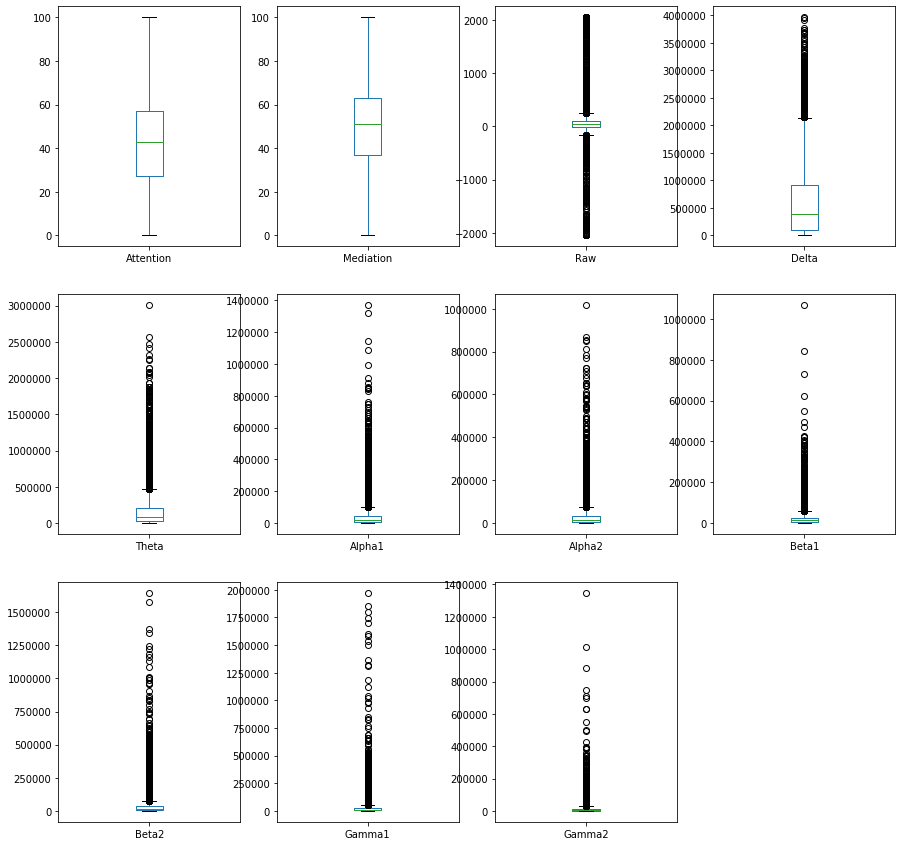

In [36]:
features[continious_features].plot(kind='box', figsize=(15, 15), subplots=True, layout=(3,4))
plt.show()

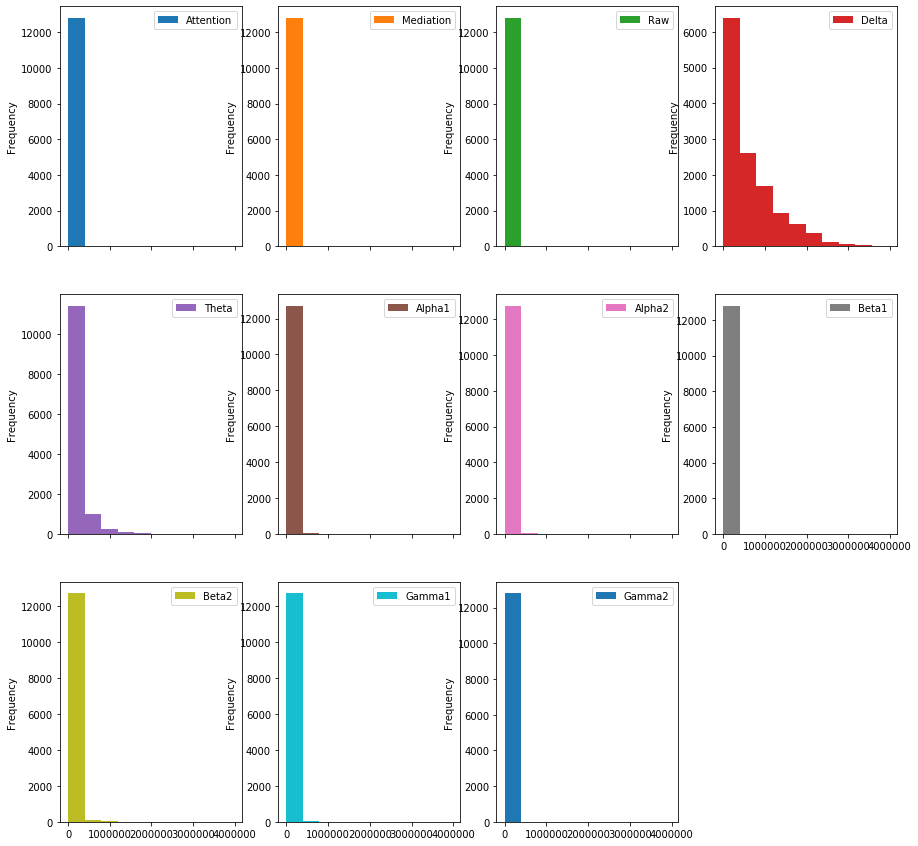

In [37]:
features[continious_features].plot(kind='hist', figsize=(15, 15), subplots=True, layout=(3,4))
plt.show()

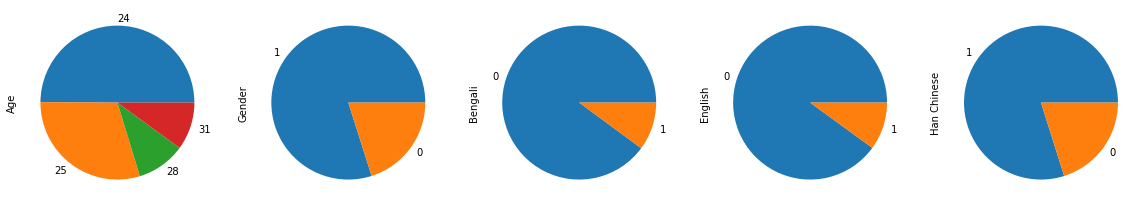

In [41]:
# gosh this is painful matplotlib syntax
plt.figure(figsize=(20, 5))
for feature in categorical_features: 
    plt.subplot(1, 5, categorical_features.index(feature) + 1)
    features[feature].value_counts().plot(kind='pie')
plt.show()

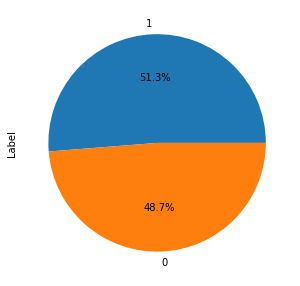

In [45]:
plt.figure(figsize=(5, 5))
df['Label'].value_counts().plot(kind='pie', autopct='%.1f%%')
plt.show()

<Figure size 1440x1440 with 0 Axes>

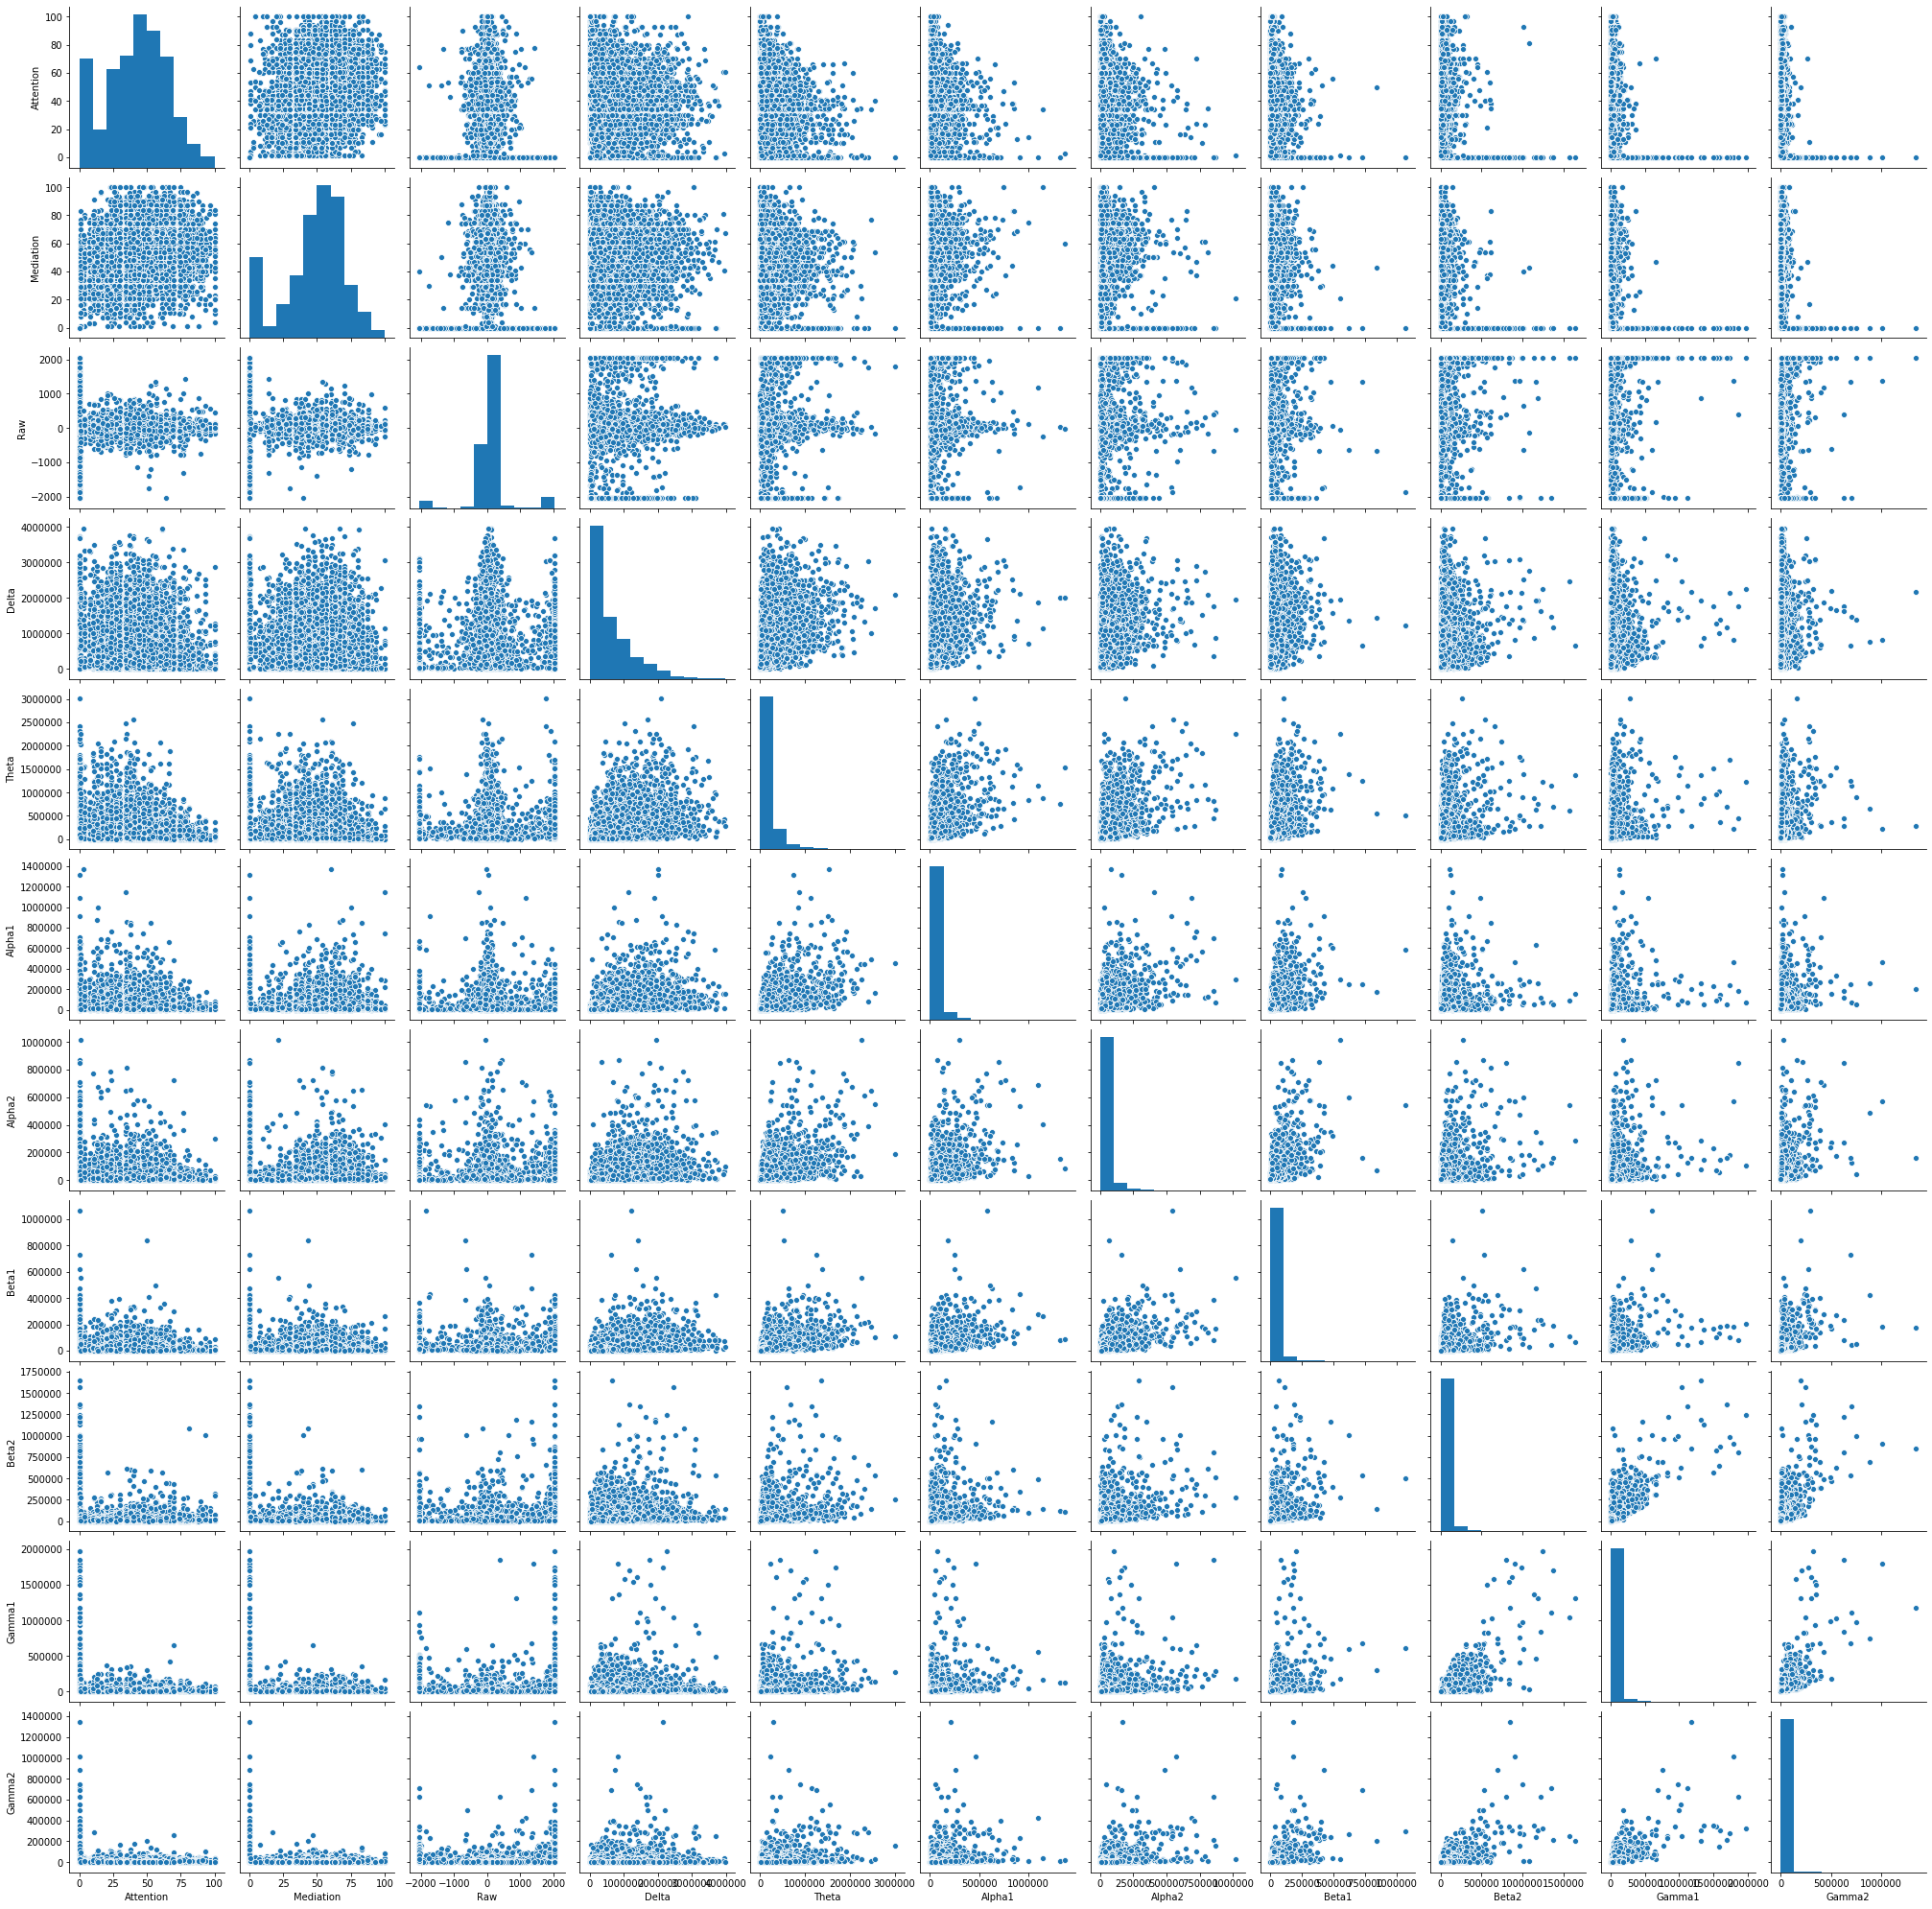

In [47]:
plt.figure(figsize=(20,20))
sns.pairplot(features[continious_features])

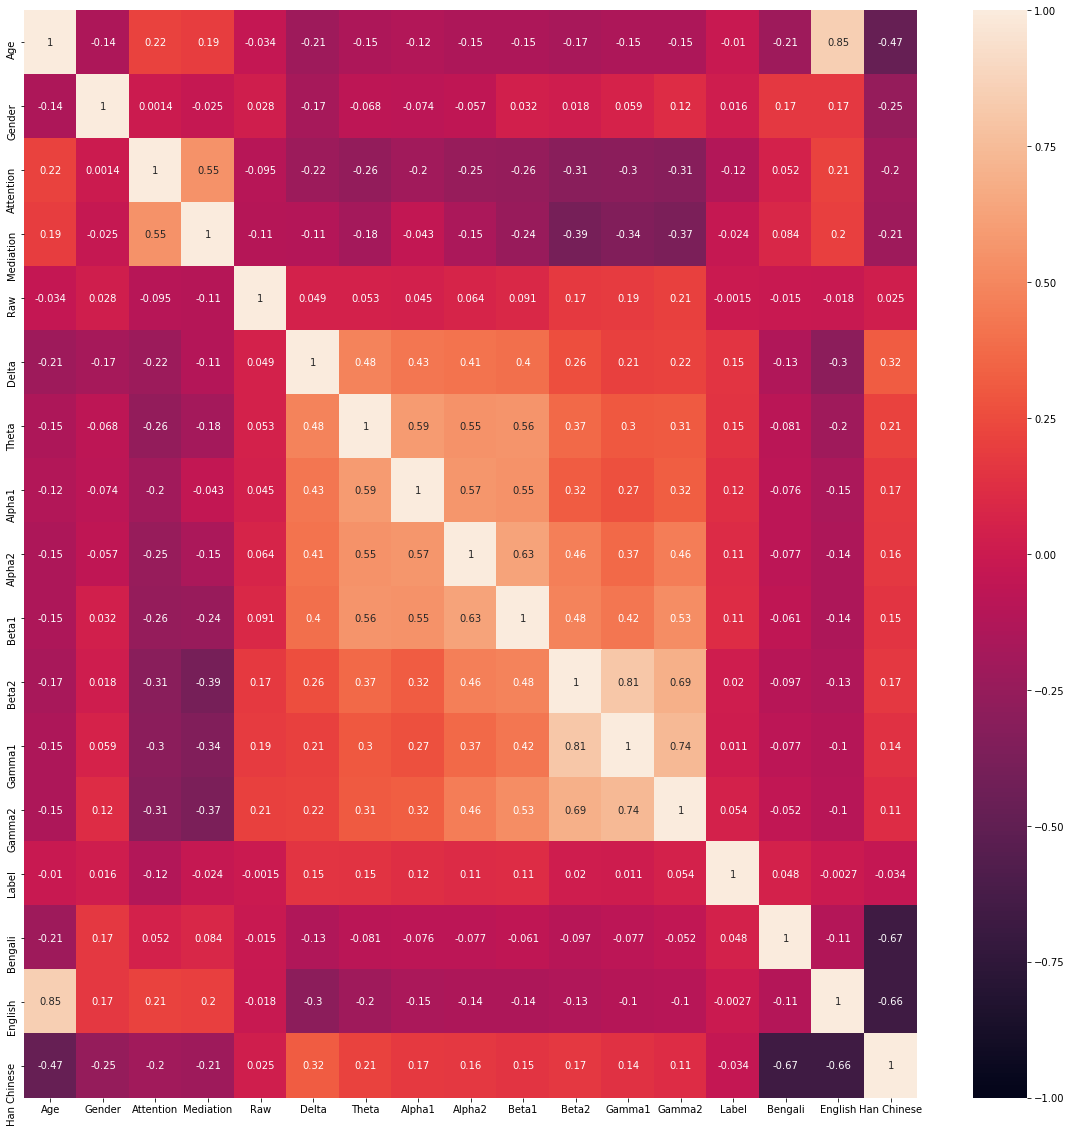

In [49]:
corr = df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True, vmin=-1.0)

In [51]:
# scaling and splitting data
X = df.drop('Label', axis=1).copy()
y = df['Label'].copy()

In [52]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [54]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8967, 16), (3844, 16), (8967,), (3844,))